In [1]:
from sklearn.manifold import TSNE, Isomap
from gensim.models import KeyedVectors
import numpy as np

## Data dependencies

```
../data/tencent_d200_500k.bin 53f5b4
```

In [2]:
from hashlib import sha1
from pathlib import Path
paths = ["../data/tencent_d200_500k.bin"]
for path_x in paths:
    h = sha1()
    h.update(Path(path_x).read_bytes())
    print(path_x, h.hexdigest()[:6])

../data/tencent_d200_500k.bin 53f5b4


In [3]:
kv = KeyedVectors.load_word2vec_format("../data/tencent_d200_500k.bin", binary=True)

In [4]:
kv.vectors.shape

(500000, 200)

In [34]:
neighs = [x[0] for x in kv.most_similar("人", topn=19)]

In [36]:
neigh_vecs = [kv.get_vector(x, norm=True) for x in neighs]
neigh_vecs = np.vstack(neigh_vecs + [kv.get_vector("人", norm=True)])


In [37]:
neigh_vecs.shape

(20, 200)

In [ ]:
from scipy import 
neigh_vecs

In [41]:
from tqdm.auto import tqdm

In [43]:
n_vocab = len(kv.index_to_key)

In [51]:
n_neigh = {}
import random
for _, w in tqdm(enumerate(kv.index_to_key), total=n_vocab):    
    if random.random() < 0.97: continue
    neighs = kv.most_similar(w, topn=100)
    n_neigh[w] = sum(1 for x in neighs if x[1]>0.8)

  0%|          | 0/500000 [00:00<?, ?it/s]

(array([11717.,  1213.,   474.,   274.,   185.,   128.,    94.,    66.,
           72.,   763.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

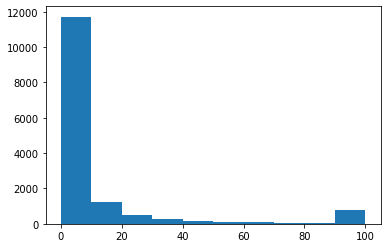

In [52]:
import matplotlib.pyplot as plt
plt.hist(n_neigh.values())